In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import metrics

In [2]:
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv('./data/iris.data', names=names)

X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [3]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()

X_train = s.fit_transform(X_train)
X_test = s.fit_transform(X_test)

In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [5]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test)
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.8333333333333334


In [6]:
k = 10
acc_array = np.zeros(k)
for k in np.arange(1, k+1, 1):
    classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    acc_array[k-1] = acc
    
max_acc = np.amax(acc_array)
acc_list = list(acc_array)
k = acc_list.index(max_acc)
print(f'Accuracy: {max_acc} and optimal k : {k+1}')

Accuracy: 0.8666666666666667 and optimal k : 3


In [7]:
from sklearn import svm
from sklearn import metrics
from sklearn import datasets
from sklearn import model_selection

In [8]:
iris = datasets.load_iris()
x_train, x_test, y_train, y_test = model_selection.train_test_split(iris.data, iris.target, test_size=0.6, random_state=42)

In [9]:
svm = svm.SVC(kernel='linear', C=1.0, gamma=0.5)
svm.fit(x_train, y_train)
predictions = svm.predict(x_test)
score = metrics.accuracy_score(y_test, predictions)
print(f'Accuaracy: {score}')

Accuaracy: 0.9888888888888889


In [10]:
import pandas as pd
df = pd.read_csv('./data/titanic/train.csv', index_col='PassengerId')
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [11]:
df = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]
df['Sex'] = df['Sex'].map({'male' : 0, 'female': 1})
df = df.dropna()
X = df.drop('Survived', axis=1)
y = df['Survived']

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [13]:
from sklearn import tree
model = tree.DecisionTreeClassifier()

In [14]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [15]:
y_predict = model.predict(X_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_predict)

0.8156424581005587

In [16]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(
    confusion_matrix(y_test, y_predict),
    columns=['Predicted Not Survival', 'Predicted Survival'],
    index=['True Not Survival', 'True Survival']
)

,Predicted Not Survival,Predicted Survival
True Not Survival,96,16
True Survival,17,50


In [17]:
%matplotlib inline
from sklearn.datasets import load_digits
digits = load_digits()
print('Image Data Shape', digits.data.shape)
print('Label Data Shape', digits.target.shape)

Image Data Shape (1797, 64)
Label Data Shape (1797,)


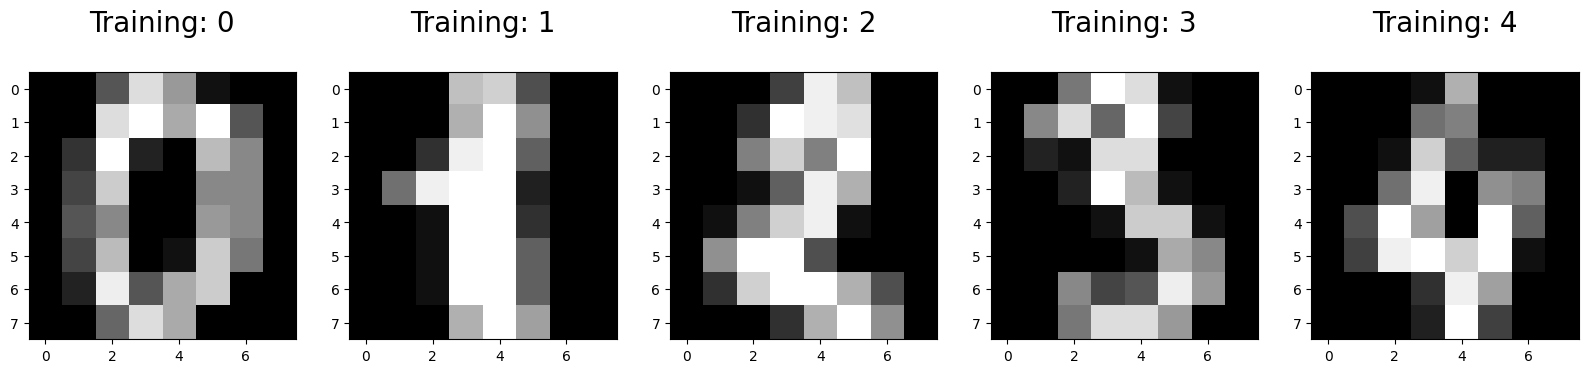

In [18]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title(f'Training: {label}\n', fontsize=20)

In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.25, random_state=0)

from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()
logisticRegr.fit(x_train, y_train)

/opt/conda/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [21]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [22]:
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


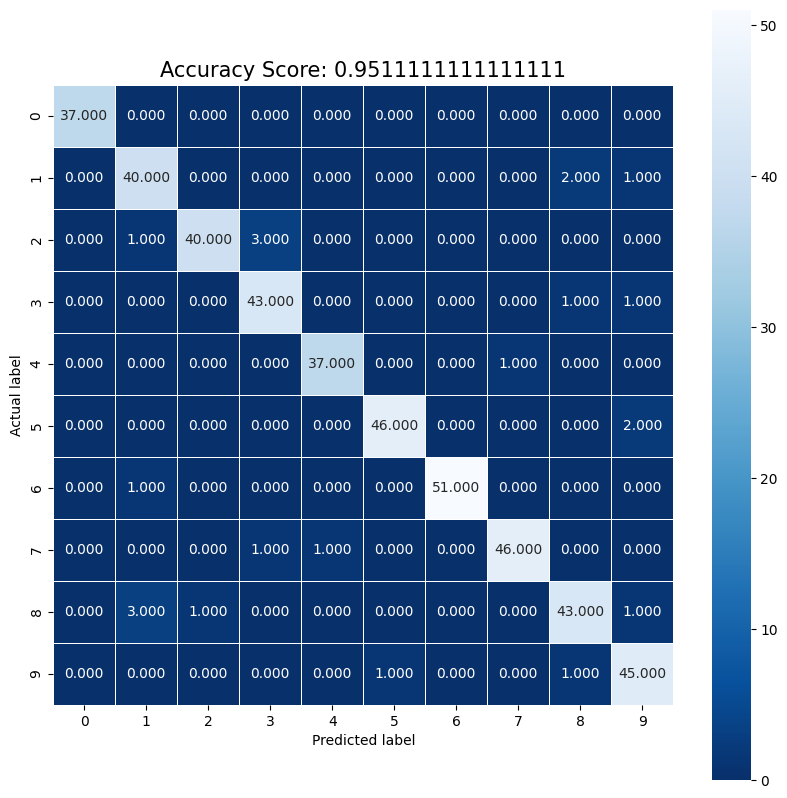

In [23]:
import numpy as np
import seaborn as sns
from sklearn import metrics

cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, fmt='.3f', linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = f'Accuracy Score: {score}'
plt.title(all_sample_title, size=15)
plt.show()

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

In [25]:
dataset = pd.read_csv('./data/weather.csv')

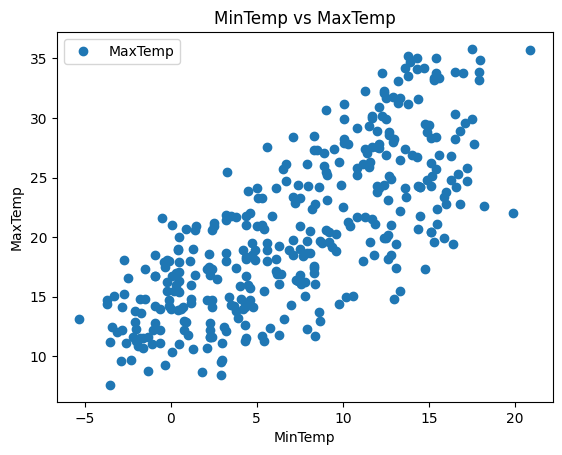

In [26]:
dataset.plot(x='MinTemp', y='MaxTemp', style='o')
plt.title('MinTemp vs MaxTemp')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.show()

In [27]:
X = dataset['MinTemp'].values.reshape(-1, 1)
y = dataset['MaxTemp'].values.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [28]:
y_pred = regressor.predict(X_test)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,25.2,23.413030
1,11.5,13.086857
2,21.1,27.264856
3,22.2,25.461874
4,20.4,26.937041
...,...,...
69,18.9,20.216833
70,22.8,27.674625
71,16.1,21.446140
72,25.1,24.970151


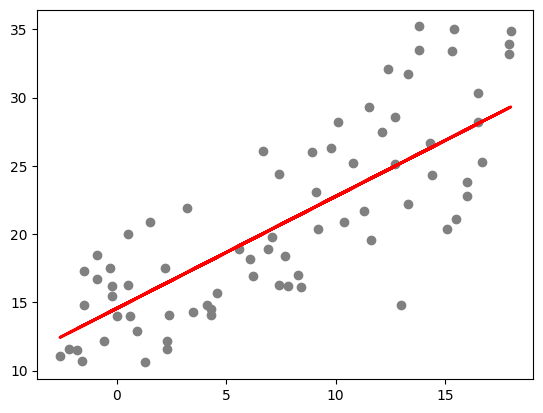

In [29]:
plt.scatter(X_test, y_test, color='gray')
plt.plot(X_test, y_pred, color = 'red', linewidth=2)
plt.show()

In [30]:
print('평균제곱법: ', metrics.mean_squared_error(y_test, y_pred))
print('루트 평균제곱법: ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

평균제곱법:  17.011877668640622
루트 평균제곱법:  4.124545753006096


In [31]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [32]:
data = pd.read_csv('./data/sales data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [33]:
categorical_features = ['Channel', 'Region']
continuous_features = ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']

for col in categorical_features:
    dummies = pd.get_dummies(data[col], prefix=col)
    data = pd.concat([data, dummies], axis=1)
    data.drop(col, axis=1, inplace=True)
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Channel_1,Channel_2,Region_1,Region_2,Region_3
0,12669,9656,7561,214,2674,1338,False,True,False,False,True
1,7057,9810,9568,1762,3293,1776,False,True,False,False,True
2,6353,8808,7684,2405,3516,7844,False,True,False,False,True
3,13265,1196,4221,6404,507,1788,True,False,False,False,True
4,22615,5410,7198,3915,1777,5185,False,True,False,False,True


In [34]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

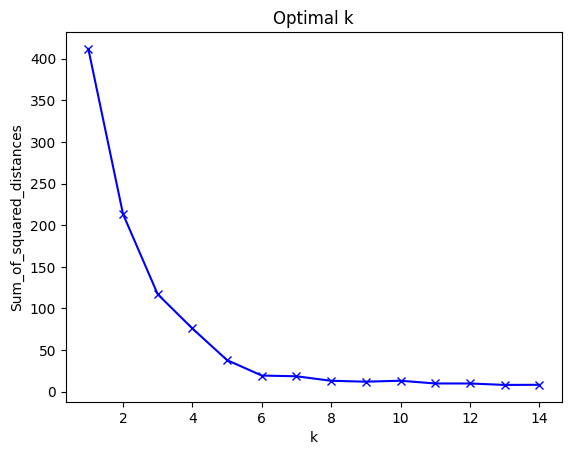

In [35]:
mms = MinMaxScaler()
mms.fit(data)
data_transformed = mms.transform(data)

Sum_of_squared_distances = []
K = range(1, 15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Optimal k')
plt.show()

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

In [37]:
X = pd.read_csv('./data/credit card.csv')
X = X.drop('CUST_ID', axis=1)
X.fillna(method='ffill', inplace=True)
print(X.head())

       BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                

/tmp/ipykernel_44630/2632436077.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  X.fillna(method='ffill', inplace=True)


In [38]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_normalized = normalize(X_scaled)
X_normalized = pd.DataFrame(X_normalized)
pca = PCA(n_components=2)
X_principal = pca.fit_transform(X_normalized)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']
print(X_principal.head())

         P1        P2
0 -0.489949 -0.679976
1 -0.519099  0.544827
2  0.330633  0.268879
3 -0.481656 -0.097611
4 -0.563512 -0.482506


In [39]:
db_default = DBSCAN(eps = 0.0375, min_samples = 3).fit(X_principal)
labels = db_default.labels_

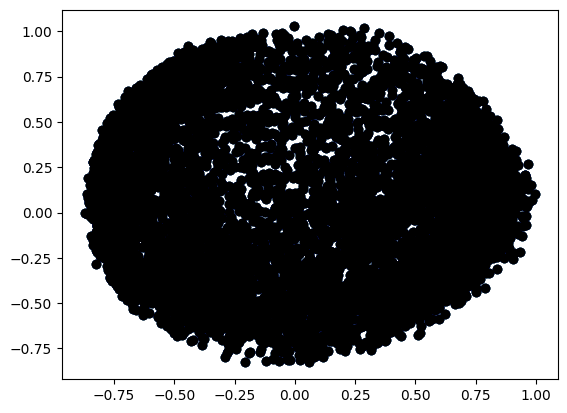

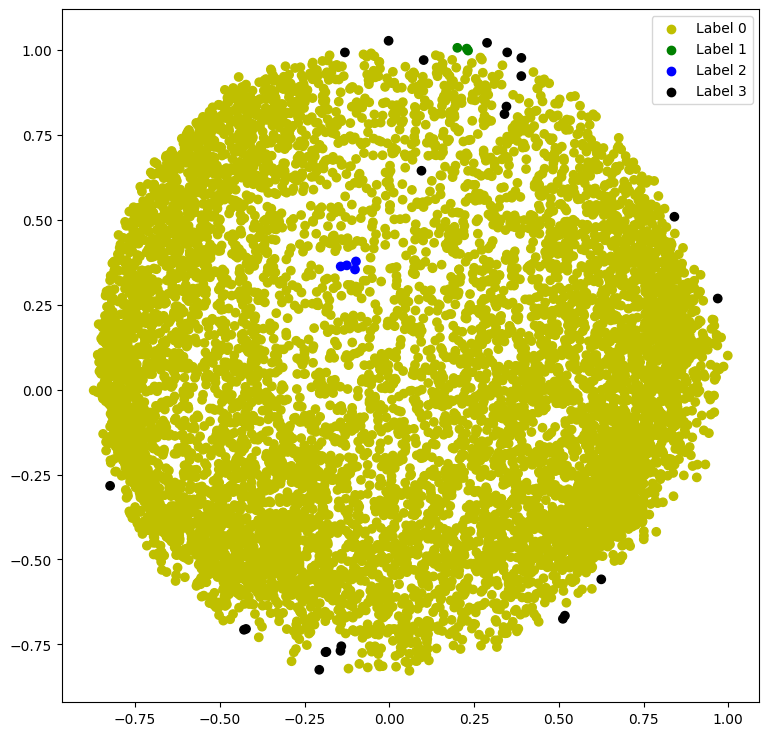

In [40]:
colors = {}
colors[0] = 'y'
colors[1] = 'g'
colors[2] = 'b'
colors[-1] = 'k'

cvec = [colors[label] for label in labels]

r = plt.scatter(X_principal['P1'], X_principal['P2'], color='y')
g = plt.scatter(X_principal['P1'], X_principal['P2'], color='g')
b = plt.scatter(X_principal['P1'], X_principal['P2'], color='b')
k = plt.scatter(X_principal['P1'], X_principal['P2'], color='k')

plt.figure(figsize= (9,9))
plt.scatter(X_principal['P1'], X_principal['P2'], c=cvec)

plt.legend((r,g,b,k), ('Label 0', 'Label 1', 'Label 2', 'Label 3'))
plt.show()

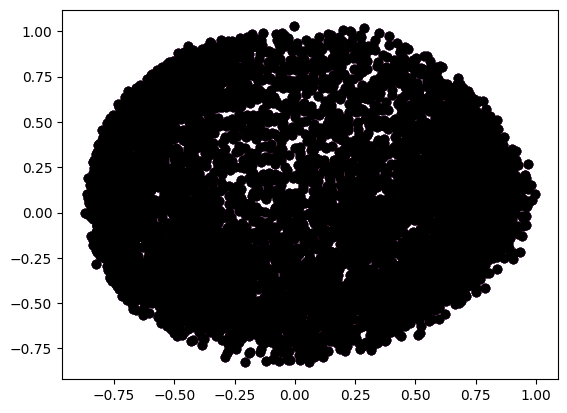

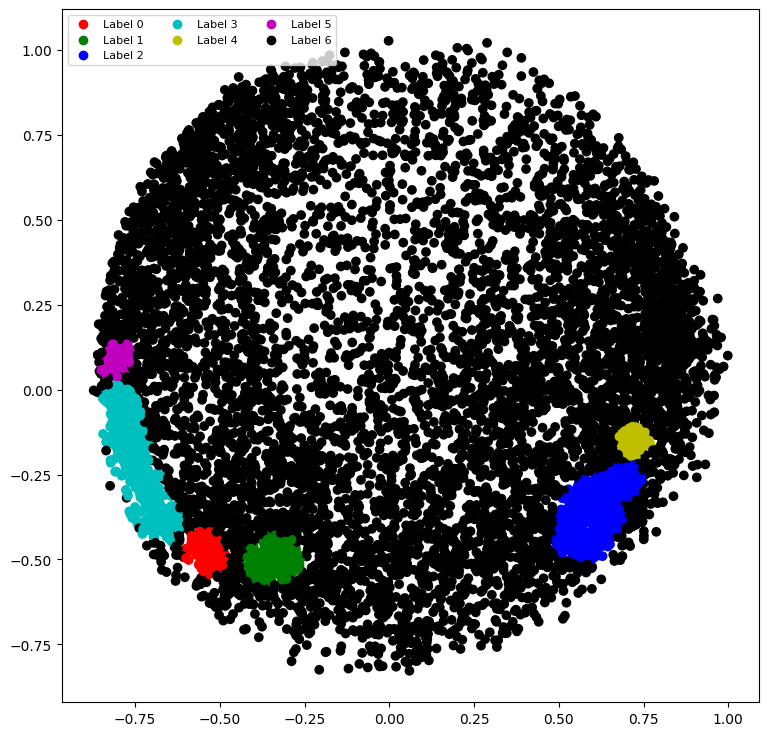

In [41]:
db = DBSCAN(eps = 0.0375, min_samples = 50).fit(X_principal) 
labels1 = db.labels_


colors1 = {} 
colors1[0] = 'r'
colors1[1] = 'g'
colors1[2] = 'b'
colors1[3] = 'c'
colors1[4] = 'y'
colors1[5] = 'm'
colors1[-1] = 'k'
  
cvec = [colors1[label] for label in labels1] 
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[0]) 
g = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[1]) 
b = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[2]) 
c = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[3]) 
y = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[4]) 
m = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[5]) 
k = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label 6'), 
           scatterpoints = 1, loc ='upper left', ncol = 3, fontsize = 8) 
plt.show()

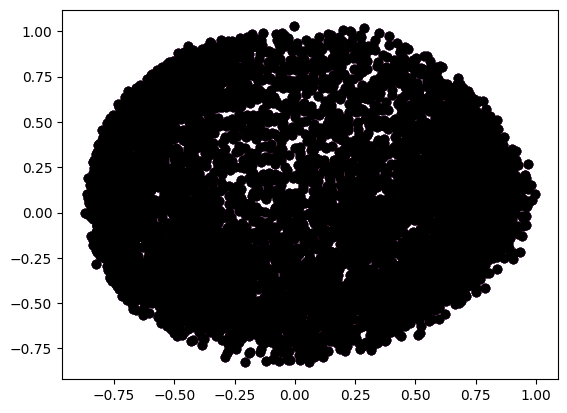

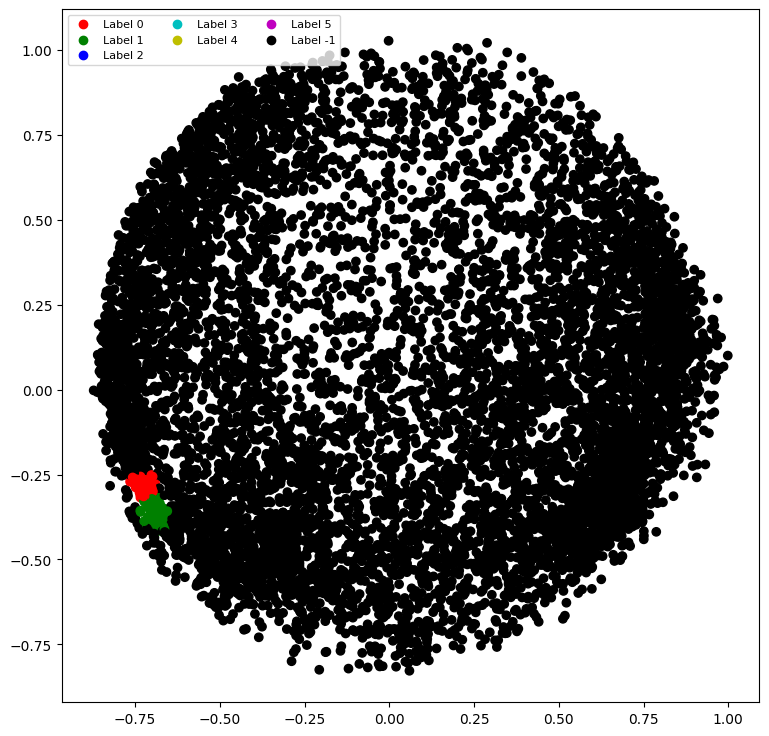

In [42]:
db = DBSCAN(eps = 0.0375, min_samples = 100).fit(X_principal)
labels1 = db.labels_

colors1 = {} 
colors1[0] = 'r'
colors1[1] = 'g'
colors1[2] = 'b'
colors1[3] = 'c'
colors1[4] = 'y'
colors1[5] = 'm'
colors1[-1] = 'k'
  
cvec = [colors1[label] for label in labels1] 
colors1 = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ] 
  
r = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[0]) 
g = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[1]) 
b = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[2]) 
c = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[3]) 
y = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[4]) 
m = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[5]) 
k = plt.scatter(X_principal['P1'], X_principal['P2'], marker ='o', color = colors1[6]) 
  
plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((r, g, b, c, y, m, k), 
           ('Label 0', 'Label 1', 'Label 2', 'Label 3', 'Label 4', 'Label 5', 'Label -1'), 
           scatterpoints = 1, loc ='upper left', ncol = 3, fontsize = 8) 
plt.show()